# Movie Rating Distributions

#### Grading:


- Code: 90 pts
- Markdown Documentation: 10 pts


In this assignment we are going understand distributions

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from IPython.display import HTML, display
import numpy as np

from scipy.stats.distributions import norm


# pd.set_option('display.notebook_repr_html', False)
# pd.set_option('display.max_columns', 20)
# pd.set_option('display.max_rows', 25)

In [2]:
%matplotlib inline

##### Read in the movie data: `pd.read_table`

In [3]:
def get_movie_data():
    
    unames = ['user_id','gender','age','occupation','zip']
    users = pd.read_table(os.path.join('../data','users.dat'), 
                          sep='::', header=None, names=unames, encoding='latin-1')
    
    rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
    ratings = pd.read_table(os.path.join('../data', 'ratings.dat'), 
                            sep='::', header=None, names=rnames, encoding='latin-1')
    
    mnames = ['movie_id', 'title','genres']
    movies = pd.read_table(os.path.join('../data', 'movies.dat'), 
                           sep='::', header=None, names=mnames, encoding='latin-1')

    return users, ratings, movies

In [4]:
users, ratings, movies = get_movie_data()

C:\Users\p_bud\AppData\Local\Temp\ipykernel_11816\449773986.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users = pd.read_table(os.path.join('../data','users.dat'),
C:\Users\p_bud\AppData\Local\Temp\ipykernel_11816\449773986.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_table(os.path.join('../data', 'ratings.dat'),
C:\Users\p_bud\AppData\Local\Temp\ipykernel_11816\449773986.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid t

In [5]:
print(users.head())

   user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455


In [6]:
print(ratings.head())

   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291


In [7]:
print(movies.head())

   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy


##### Clean up the `movies`

- Get the `year`
- Shorten the `title`


In [8]:
tmp = movies.title.str.extract('(.*) \(([0-9]+)\)')
tmp.apply(lambda x:x[0] if len(x) > 0 else None)
tmp.apply(lambda x: x[0][:40] if len(x) > 0 else None)

0    Toy Story
1         1995
dtype: object

In [9]:
movies['year'] = tmp[1]
movies['short_title'] = tmp[0]

In [10]:
print(movies.head())

   movie_id                               title                        genres  \
0         1                    Toy Story (1995)   Animation|Children's|Comedy   
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy   
2         3             Grumpier Old Men (1995)                Comedy|Romance   
3         4            Waiting to Exhale (1995)                  Comedy|Drama   
4         5  Father of the Bride Part II (1995)                        Comedy   

   year                  short_title  
0  1995                    Toy Story  
1  1995                      Jumanji  
2  1995             Grumpier Old Men  
3  1995            Waiting to Exhale  
4  1995  Father of the Bride Part II  


### 1. What is the overal distribution of ratings (20 pts)

- Describe the distribution and its properties

### Merging the files as its required for the next task in the assignment

In [11]:
user_rating_df  = pd.merge(users  , ratings , on = 'user_id')

In [12]:
user_rating_movies_df  = pd.merge(user_rating_df  , movies , on = 'movie_id')

In [13]:
user_rating_movies_df

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres,year,short_title
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,1975,One Flew Over the Cuckoo's Nest
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,1975,One Flew Over the Cuckoo's Nest
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,1975,One Flew Over the Cuckoo's Nest
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,1975,One Flew Over the Cuckoo's Nest
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,1975,One Flew Over the Cuckoo's Nest
...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary,1998,Modulations
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama,1998,Broken Vessels
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama,1999,White Boys
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western,1973,One Little Indian


#### Mean

In [14]:
user_rating_movies_df.rating.mean()

3.581564453029317

#### Median

In [15]:
user_rating_movies_df.rating.median()

4.0

#### 5 number summary

In [16]:
user_rating_movies_df.rating.describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

#### Skew

In [17]:
user_rating_movies_df.rating.skew()

-0.5536098874940055

#### Kurtoisis

In [18]:
user_rating_movies_df.rating.kurt()

-0.3519708031404183

<AxesSubplot: >

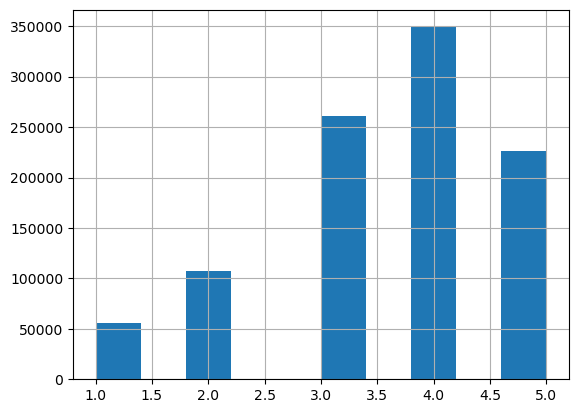

In [19]:
user_rating_movies_df.rating.hist()

* To understand the distribution better I created a histogram and we see that this data is left skewed( negative skewed). The skewness tells the direction of the outliers.  
* In this dataset ratings from 1 to 2.5 is less because very few people rate movies bad unless the movie is very bad. But since movies are for entertaimnet the movies will be average or very good. 
* For the movie to be bad or very bad, the probability is less. Thus its normal to get left skewed for this data. 
* The negative kurtosis says that the distribution is slighlty flattened. 

#### Describe the type distribution and why?

* The ratings are countable from the range 1 to 5. From the histogram we observe that the variable is discrete and there is no in between values the user can rate. So the variable is a discrete.

* A movie has to be released for the ratings to be recorded so here the movie is rated until the next good movie is released. People tend to watch movie and rate it till its trending or you can say there is another hit movie that will be releasing and people are waiting for it ( predictions based on exciting trailer). After a new movie is released or the the movie gets old the probability of people rating the movie is very less. 

* As mentioned above people rate the movies from 3 to 5 scale more unless the movie is very bad. But the responses to get 1 - 2 ratings is very less and because of this the data is left skewed.

* The distribution should be a bionomial distribution as we are checking the number of times rating 1 was voted by a set of users. No. of times users rated 2 and so on. 



### 2. What's the distribution of average ratings of movies in action vs drama genres? (20 pts))

### I grouped the dataset with movie_id , genre and then calculated the mean rating for each movie. The data is filtered by genre i.e Drama and action and then for each genre dataset  mean values are calculated. This 

In [20]:
user_rating_movies_df_grp = user_rating_movies_df.groupby(['movie_id' ,'title' , 'genres'])

In [21]:
user_rating_movies_df_grp

#### Calculate the mean of the ratings columns for each movie

In [22]:
user_rating_movies_df_grp = user_rating_movies_df_grp.agg({'rating':'mean'}).reset_index()

In [23]:
user_rating_movies_df_grp

,movie_id,title,genres,rating
0,1,Toy Story (1995),Animation|Children's|Comedy,4.146846
1,2,Jumanji (1995),Adventure|Children's|Fantasy,3.201141
2,3,Grumpier Old Men (1995),Comedy|Romance,3.016736
3,4,Waiting to Exhale (1995),Comedy|Drama,2.729412
4,5,Father of the Bride Part II (1995),Comedy,3.006757
...,...,...,...,...
3701,3948,Meet the Parents (2000),Comedy,3.635731
3702,3949,Requiem for a Dream (2000),Drama,4.115132
3703,3950,Tigerland (2000),Drama,3.666667
3704,3951,Two Family House (2000),Drama,3.900000


In [24]:
drama_df = user_rating_movies_df_grp[user_rating_movies_df_grp['genres']== 'Drama']

In [25]:
drama_df

,movie_id,title,genres,rating
13,14,Nixon (1995),Drama,3.542484
25,26,Othello (1995),Drama,3.530000
26,27,Now and Then (1995),Drama,2.934426
29,30,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Drama,3.648649
30,31,Dangerous Minds (1995),Drama,3.113475
...,...,...,...,...
3668,3915,Girlfight (2000),Drama,3.511811
3669,3916,Remember the Titans (2000),Drama,3.924485
3702,3949,Requiem for a Dream (2000),Drama,4.115132
3703,3950,Tigerland (2000),Drama,3.666667


In [26]:
action_df = user_rating_movies_df_grp[user_rating_movies_df_grp['genres'] == 'Action']

In [27]:
action_df

,movie_id,title,genres,rating
8,9,Sudden Death (1995),Action,2.656863
19,20,Money Train (1995),Action,2.537500
69,71,Fair Game (1995),Action,2.104167
139,145,Bad Boys (1995),Action,3.295580
198,204,Under Siege 2: Dark Territory (1995),Action,2.921182
...,...,...,...,...
3392,3633,On Her Majesty's Secret Service (1969),Action,3.461756
3394,3635,"Spy Who Loved Me, The (1977)",Action,3.605749
3398,3639,"Man with the Golden Gun, The (1974)",Action,3.629067
3526,3769,Thunderbolt and Lightfoot (1974),Action,3.384211


### Mean for Action 

In [28]:
action_df.rating.mean()

3.0063487200629697

In [29]:
action_df.rating.median()

2.9711538461538463

<AxesSubplot: >

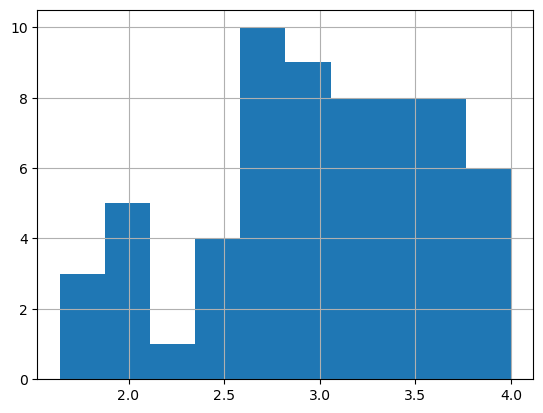

In [30]:
action_df.rating.hist()

## Inference 

* The distribution has a tail to the left than right and hence is left skewed. But the tail doesnt seem longer and have data approximately same on both the side around the mean.  
* The distribution also looks close to normal distribution, I am saying this because the mean and median values are almost near so this can be considered as a normal distribution and ratings being the continuous variable. After taking the mean of the ratings the values are non countable and are in the form of decimal so i consider it as continuous.
* Thus I conclude, With mean 3.0063487200629697 and median being 2.9711538461538463 , it is a normal distribution because the mean and median are almost near and more than 50% of the data is symmetric.

### Mean for Drama

In [31]:
drama_df.rating.mean()

3.4215077109418583

In [32]:
drama_df.rating.median()

3.513833992094862

<AxesSubplot: >

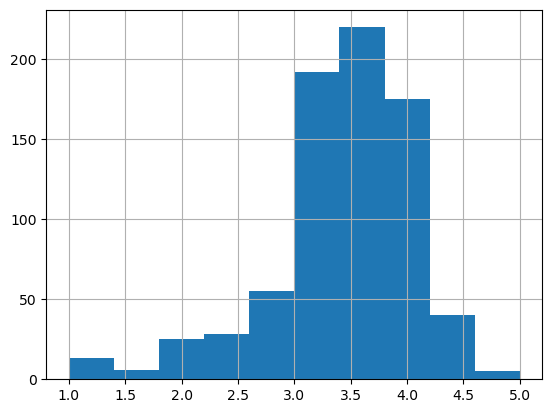

In [33]:
drama_df.rating.hist()

## Inference 

* The distribution has a longer to the left than right and hence is left skewed.
* From the mean and median we do not see much difference in the values and are approximately equal to normal distribution.

#### From both dataframes we see that it is left skewed and the mean and median are approximately close. So I consider the distribution to be normal distribution. 

### 3. Develop distribution estimators for the action vs drama genres?? (60 pts)

- Create MoM, MLE, and KDE estimates for each category 
- Compare between them to see what the differences are
- Describe the results

#### Method of Moments

##### Drama

In [34]:
#paramaeters for normal distribution
drama_mean = drama_df.rating.mean()
print(drama_mean)

3.4215077109418583


In [35]:
drama_std = drama_df.rating.std()
print(drama_std)

0.6431189361690988


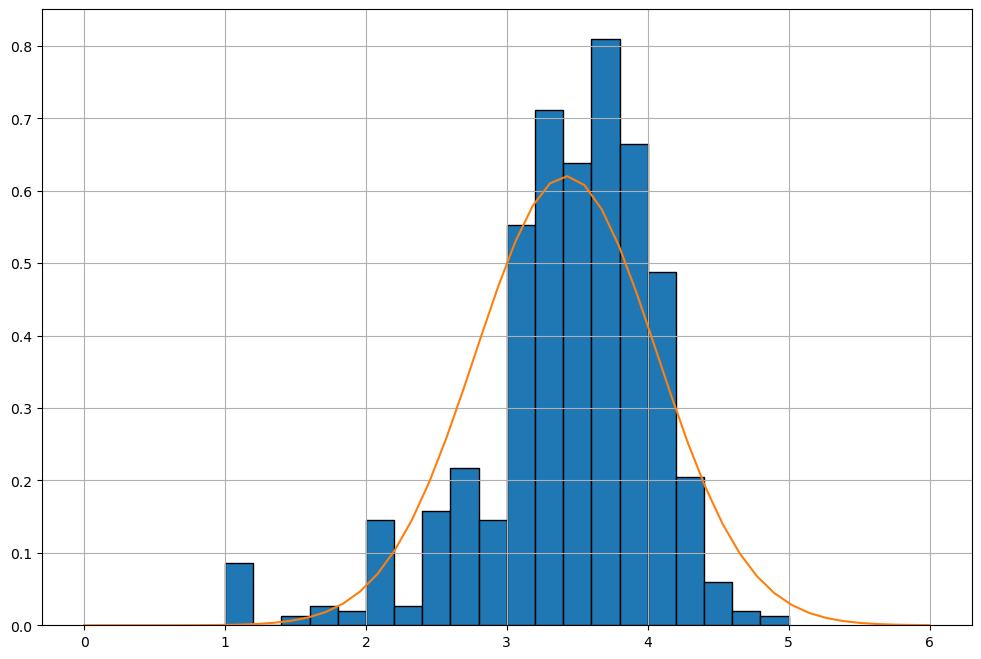

In [36]:

drama_df.rating.hist(density=True, bins=20, ec='black', figsize=(12,8))
plt.plot(np.linspace(0, 6), norm.pdf(np.linspace(0, 6), drama_mean, drama_std))

### we can interpret that the probability of getting the mean which 3. 42 is 0.62 and we see that most of the movie is rated from 3 to 4.5 range. 

### verifying for exponential if it fits the histogram and my assumption of considering it as Normal distribution is correct. 

In [37]:
#Lamda is the only estimator for exponential distribution and is calculated as below. 
lamda = 1 / drama_mean

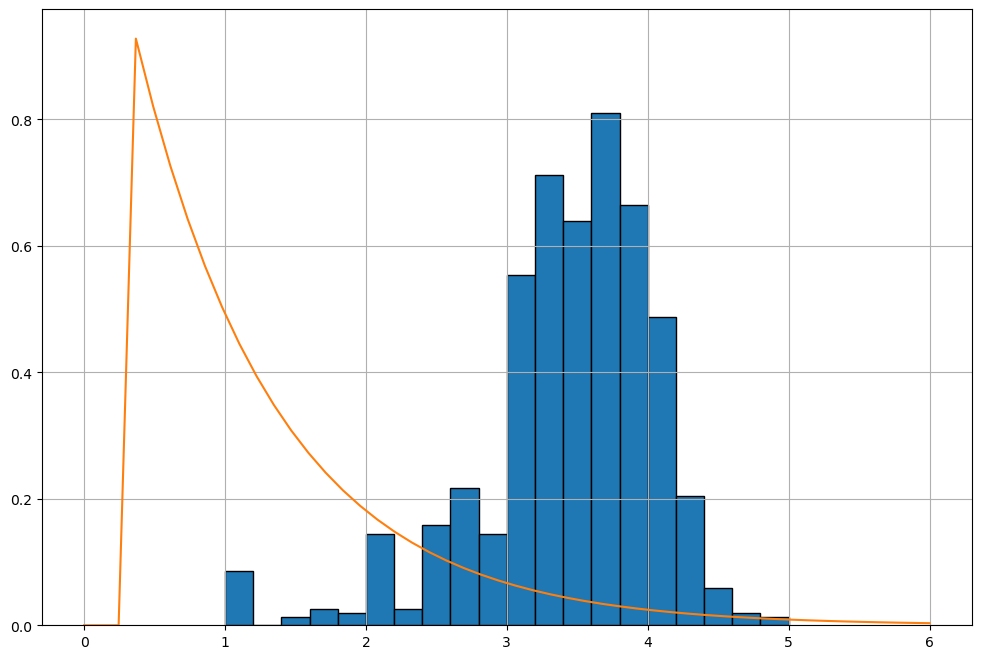

In [38]:
from scipy.stats.distributions import expon

drama_df.rating.hist(density=True, bins=20, ec='black', figsize=(12,8))
plt.plot(np.linspace(0, 6), expon.pdf(np.linspace(0, 6), lamda))

## Thus from above we confirm that since the distribution is continuous and exponential distribution doesnt fit the datapoints so our approach for stating it as normal distribution is correct 

##### Action

In [39]:
#paramaeters for normal distribution
action_mean = action_df.rating.mean()
action_std = action_df.rating.std()

In [40]:
print(action_mean)
print(action_std)

3.0063487200629697
0.5966773273185556


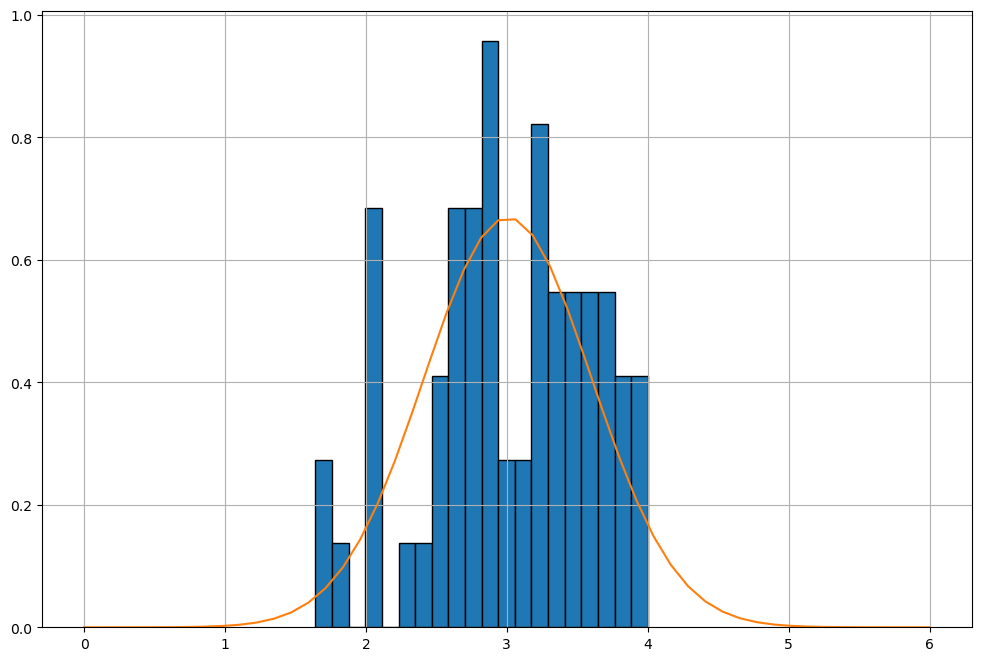

In [41]:
#Fitting the graph with the probability
action_df.rating.hist(density=True, bins=20, ec='black', figsize=(12,8))
plt.plot(np.linspace(0, 6), norm.pdf(np.linspace(0, 6), action_mean , action_std))

### We can interpret like proability of getting 2 rating is approx 0.18, for mean the approx probability is 0.67.  Most of the data is rated from 2.5 to 4

## Inference

#### comparing both

* From both the above graphs we see that the distribution fits the histogram for normal distribution than compared to the   exponential so it is confirmed that the distribution is Normal Distribution. 
* Since we have taken the mean of movies the values will range from 1 - 5 rating making it a normal distribution. Also since the movies are rated on a scale of 1 - 5, Drama data has movies which were rated as 5. So you can see the data is ditributed from 1 - 5. For Action dataset the values range from 1 - 4 . There was no movie that received ratings as 5. But the probabilities of rating, fit the histogram accurately.

#### Maximum Likelihood

Maximum likelihood estimation tells us how likely the values are to appear given a set of parameters. We can check this for different values of mean and standard deviation and then choose a parameter that maximises the likelihood. But for normal distribution the maximum likelihood is the mean and standard deviation itself. So we consider the mean of the values to determine the maximum likelihood of the function. 

##### Drama

In [42]:
#After taking the derivative of the parameters the mean and standard deviation form the parameters to find the maximum MLE
mean_mle = drama_mean
std_mle = drama_std

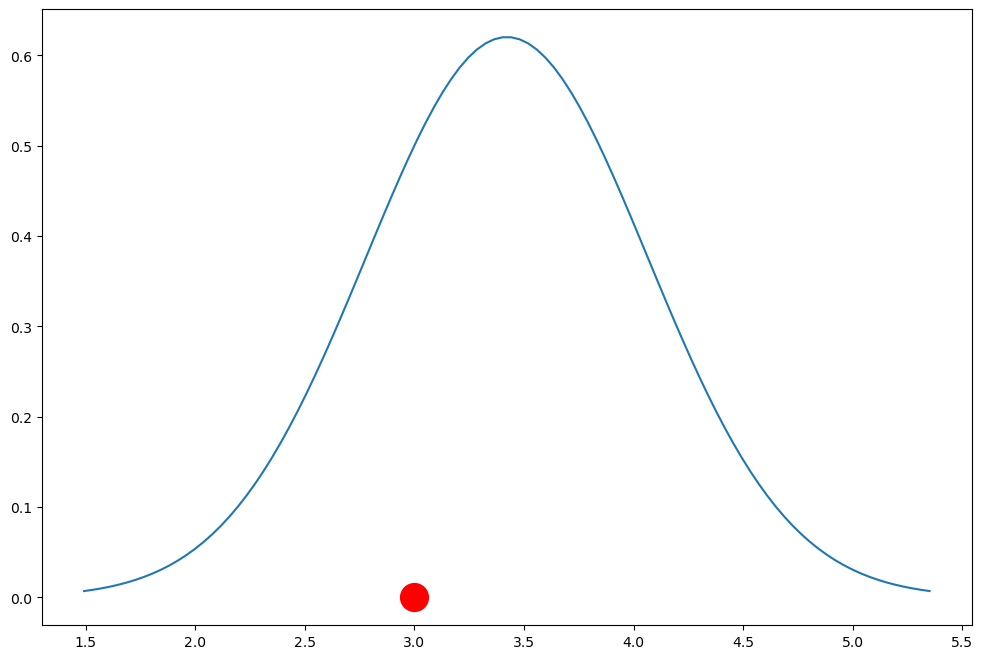

In [43]:
plt.figure(figsize=(12,8))
mu = mean_mle
sigma = std_mle
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.plot(3, 0, marker='o', markersize=20, color="red")
plt.show()

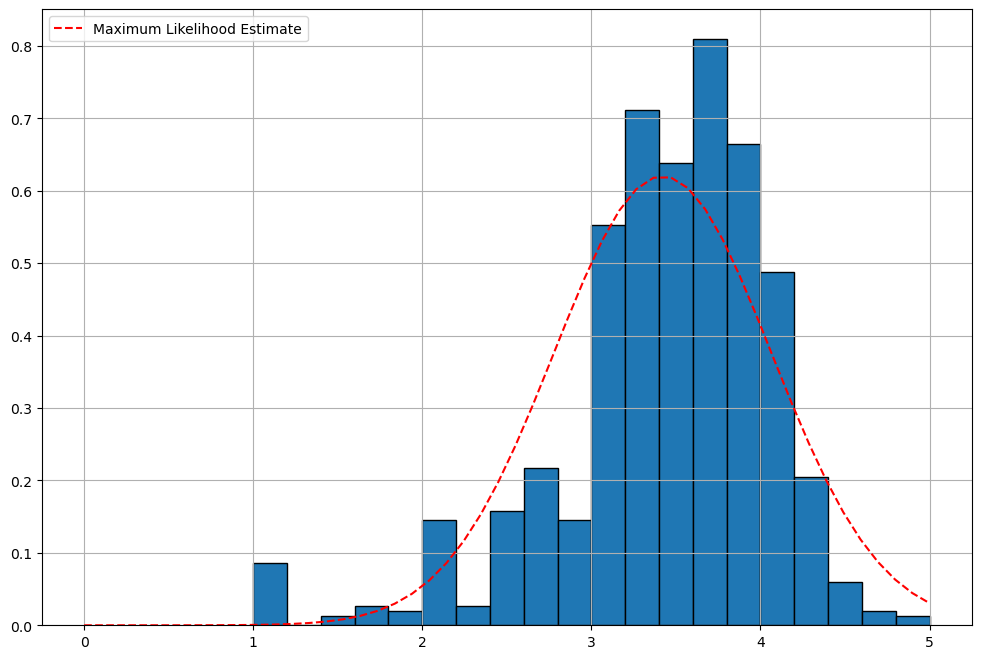

In [44]:
drama_df.rating.hist(density=True, bins=20, ec='black', figsize=(12,8))
x = np.linspace(0, drama_df.rating.max())
l1,=plt.plot(x, norm.pdf(x, mean_mle, std_mle), 'r--',  label="Maximum Likelihood Estimate")
plt.legend(handles=[l1])

##### Action

In [45]:
mean_action_mle = action_mean
std_action_mle = action_std

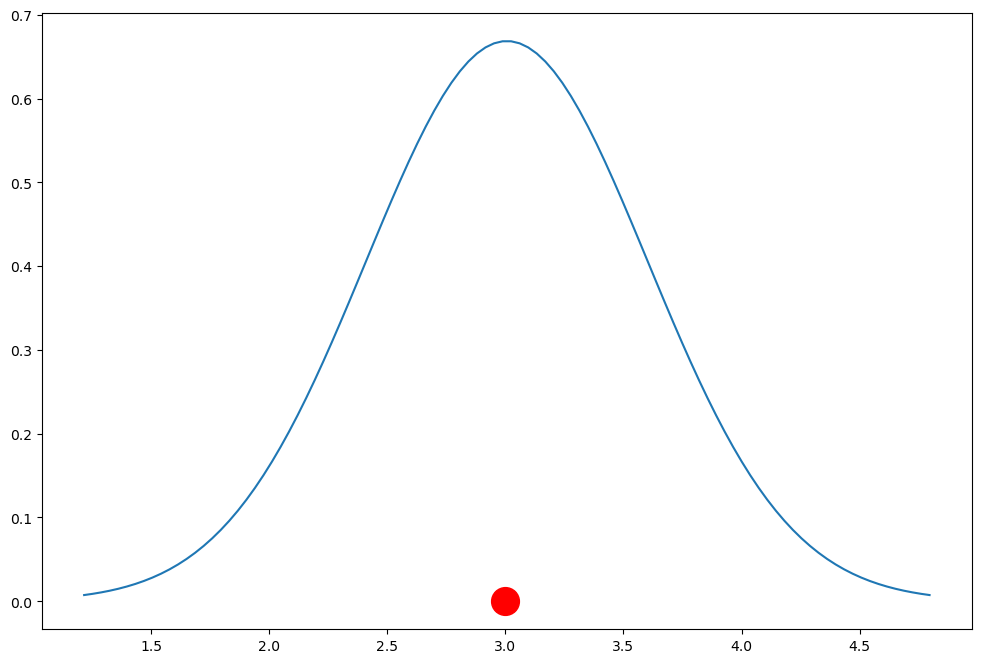

In [46]:
plt.figure(figsize=(12,8))
mu = mean_action_mle
sigma = std_action_mle
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.plot(3, 0, marker='o', markersize=20, color="red")
plt.show()

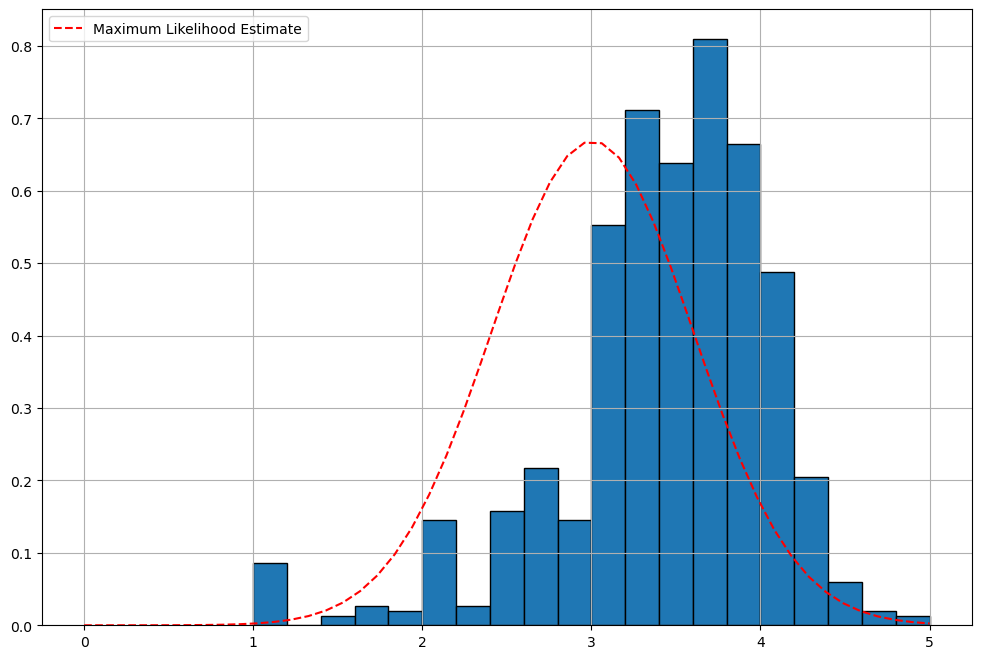

In [47]:
drama_df.rating.hist(density=True, bins=20, ec='black', figsize=(12,8))
x = np.linspace(0, drama_df.rating.max())
l1,=plt.plot(x, norm.pdf(x, mean_action_mle, std_action_mle), 'r--',  label="Maximum Likelihood Estimate")
plt.legend(handles=[l1])

### Inference 

Thus MLE basically finds the best parameter where the distribution slope is equal to zero. In this case the best parameter is the mean and the probality of having that parameter likely is  approx 0.68 for action_df and for drama_df it is 0.45


#### KDE

##### Drama

C:\Users\p_bud\AppData\Local\Temp\ipykernel_11816\1450721089.py:6: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(drama, bw_method=None)


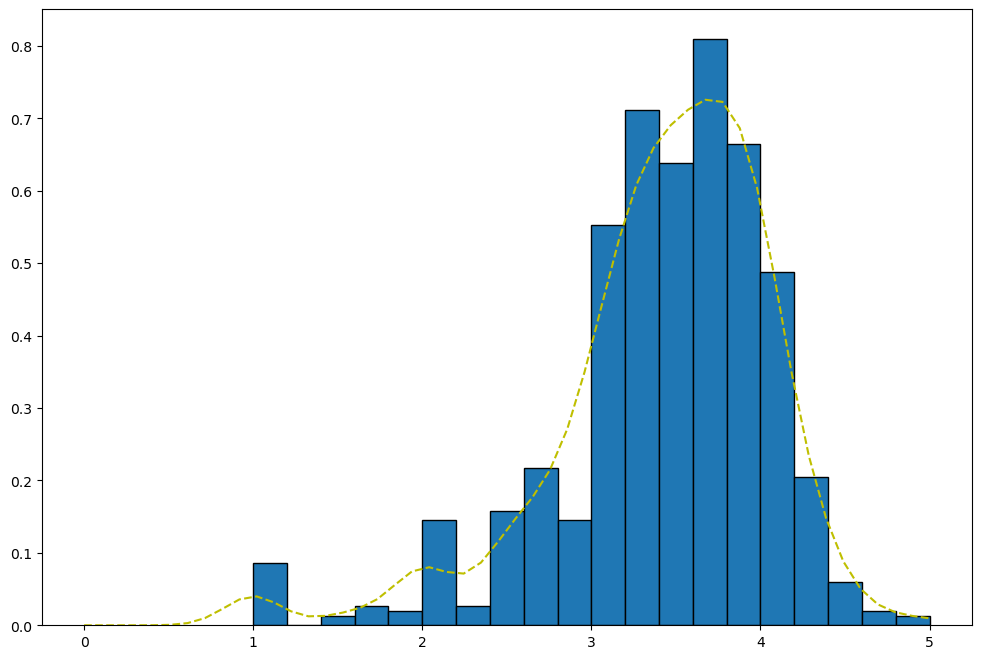

In [48]:
from scipy.stats import kde

drama = drama_df.rating
drama.hist(density=True, bins=20, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, drama.max())
density = kde.gaussian_kde(drama, bw_method=None)
xgrid = np.linspace(x.min(), x.max(), 100)

plt.plot(x, density(x), 'y--')

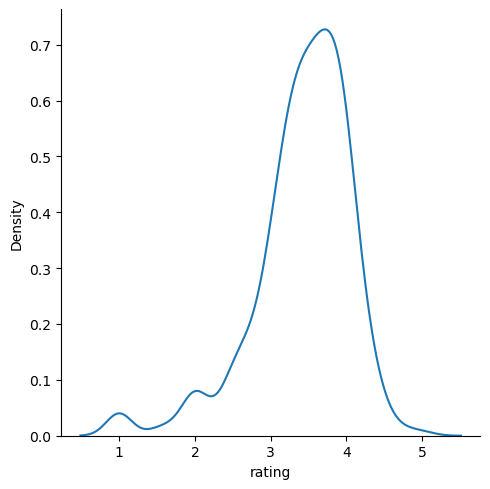

In [49]:
sns.displot(data=drama_df, x="rating",kind="kde") 

##### Action

C:\Users\p_bud\AppData\Local\Temp\ipykernel_11816\3342601776.py:6: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(action, bw_method=None)


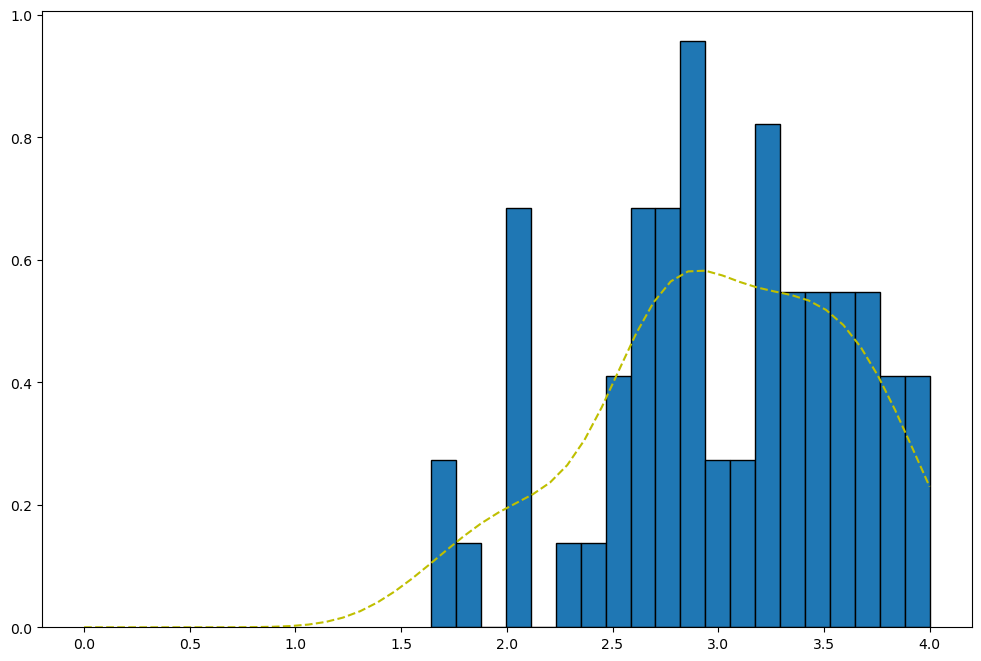

In [50]:
from scipy.stats import kde

action = action_df.rating
action.hist(density=True, bins=20, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, action.max())
density = kde.gaussian_kde(action, bw_method=None)
xgrid = np.linspace(x.min(), x.max(), 100)

plt.plot(x, density(x), 'y--')

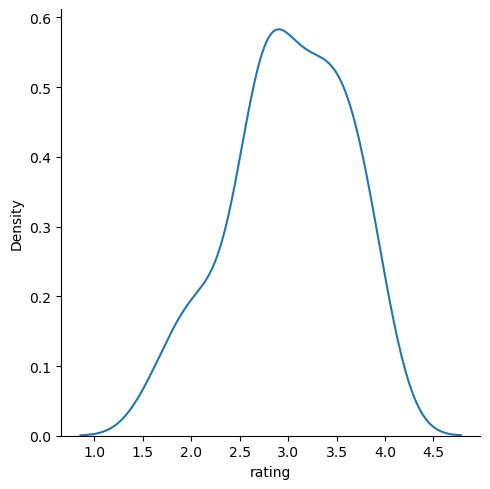

In [51]:
sns.displot(data=action_df, x="rating",kind="kde") 

* A Kernel density graph is similar to histogram. The idea here id that we define a kernel function and we centre each data point of the sample around the function. Then all the functions are summed to form a Kernel Density Estimate.
* This is non parametric i.e does not depend on the any parameter to form a curve like mean and median etc. and tries to get a snoothed or non smoothed curved based on the bandwidth set in the seaborn kdeplot. Bandwidth is the only parameter for this estimate. 
* The smoothed curve looses out information of peaks and this is obtained if the bandwidth parameter is increased. And unsmoothed curve is obtained if we reduce the bandwidth, and the plot contains many peaks and this basically increases the variance. 
* The area under the curve value equals to 1 so from the graph we can assume that what percent of the data has a rating 3 and above. It contributes to 50% if we look at the point 3 on the x - axis and the probablity would be less than 1 and greater than 0. But this isnt the approach we shud be looking at. The value of bandwidth is determined by checking the area under the curve.  
* For drama_df we can say the intervale 3 to 4  on x - axis has a width of 1 and height of 0.56 so the area under the curve give the percentage of people rated in that interval. 

* Same applies to action_Df where er check for percentage of people rated within the interval 3 - 4 
* Also the KDE deals with non negative values as probability cannot be negative. 

### Comparision with all 3 estimator methods

C:\Users\p_bud\AppData\Local\Temp\ipykernel_11816\2347250298.py:6: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(drama, bw_method=None)


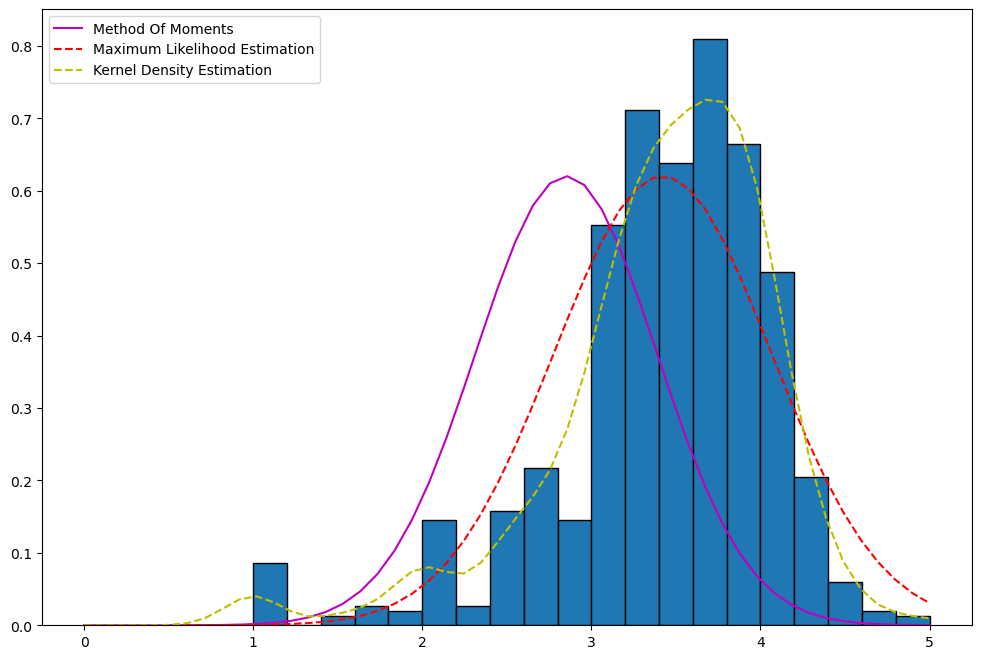

In [52]:
from scipy.stats import kde

drama = drama_df.rating
drama.hist(density=True, bins=20, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, drama.max())
density = kde.gaussian_kde(drama, bw_method=None)
xgrid = np.linspace(x.min(), x.max(), 100)

l1, = plt.plot(x, norm.pdf(np.linspace(0, 6), drama_mean, drama_std), 'm-', label="Method Of Moments")
l2, = plt.plot(x, norm.pdf(x, mean_mle, std_mle) , 'r--', label="Maximum Likelihood Estimation")
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l1,l2,l3])

C:\Users\p_bud\AppData\Local\Temp\ipykernel_11816\1513461925.py:6: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = kde.gaussian_kde(action, bw_method=None)


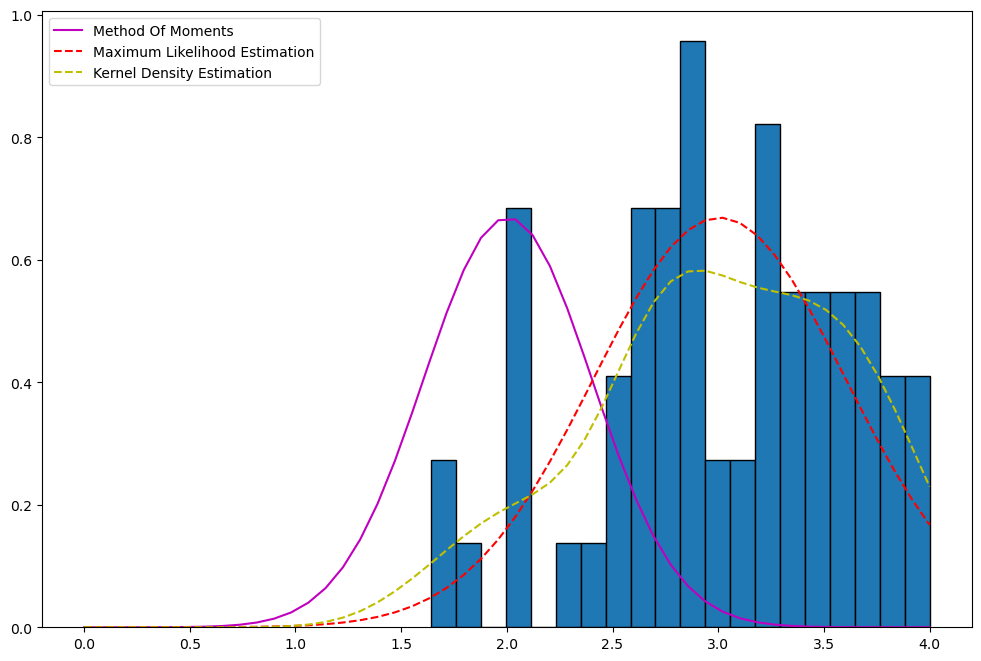

In [53]:
from scipy.stats import kde

action = action_df.rating
action.hist(density=True, bins=20, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, action.max())
density = kde.gaussian_kde(action, bw_method=None)
xgrid = np.linspace(x.min(), x.max(), 100)

l1, = plt.plot(x, norm.pdf(np.linspace(0, 6), action_mean, action_std), 'm-', label="Method Of Moments")
l2, = plt.plot(x, norm.pdf(x, mean_action_mle, std_action_mle), 'r--', label="Maximum Likelihood Estimation")
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l1,l2,l3])

### References

* http://localhost:8888/notebooks/CSC-605_Fall_2022/Class_Resources/Lecture_06/Statistics/02_Distribution.ipynb
* http://localhost:8888/notebooks/CSC-605_Fall_2022/Class_Resources/Lecture_06/Statistics/03_Distribution_Estimators.ipynb